## 10.2 時系列 データ の 視覚化

### 10.2.1. データのクレンジング

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.notebook_repr_html', False)

# CSVファイルをPandasのDataFrameに読み込む
act = pd.read_csv('OTg6QzA_activities.csv')
act.shape #データの構造、行列のサイズ

(66281, 4)

In [2]:
# 距離と速度算出のため、直前データ（t-1）を新しい列に追加
# shift(1)でtimestamp列の値が一つ下に移動させる。
act['p_timestamp'] = act['timestamp'].shift(1)
act['p_x'] = act['X'].shift(1)
act['p_y'] = act['Y'].shift(1)
act['p_z'] = act['Z'].shift(1)
act.head(5)

                 timestamp   X   Y   Z              p_timestamp   p_x   p_y  \
0  2022-01-01 00:01:40.363  33  76  56                     None   NaN   NaN   
1  2022-01-01 00:01:42.961  34  87  56  2022-01-01 00:01:40.363  33.0  76.0   
2  2022-01-01 00:01:45.562  25  89  47  2022-01-01 00:01:42.961  34.0  87.0   
3  2022-01-01 00:01:48.163  11  70  50  2022-01-01 00:01:45.562  25.0  89.0   
4  2022-01-01 00:02:08.864  33  72  58  2022-01-01 00:01:48.163  11.0  70.0   

    p_z  
0   NaN  
1  56.0  
2  56.0  
3  47.0  
4  50.0  

In [3]:
# NaN値がある行を削除する。NaNがあると距離と速度の計算ができない。
# 最初の行が削除されるでしょう。
cleaned = act.dropna()
cleaned.head(5)

                 timestamp   X   Y   Z              p_timestamp   p_x   p_y  \
1  2022-01-01 00:01:42.961  34  87  56  2022-01-01 00:01:40.363  33.0  76.0   
2  2022-01-01 00:01:45.562  25  89  47  2022-01-01 00:01:42.961  34.0  87.0   
3  2022-01-01 00:01:48.163  11  70  50  2022-01-01 00:01:45.562  25.0  89.0   
4  2022-01-01 00:02:08.864  33  72  58  2022-01-01 00:01:48.163  11.0  70.0   
5  2022-01-01 00:02:21.765  21  68  58  2022-01-01 00:02:08.864  33.0  72.0   

    p_z  
1  56.0  
2  56.0  
3  47.0  
4  50.0  
5  58.0  

In [ ]:
# 直前の座標値を使って二点間の距離を算出した値をdist列に追加します。

# 二つの座標値から距離を計算するPython関数
def calc_dist(df):
  x_d = df['X'] - df['p_x']
  y_d = df['Y'] - df['p_y']
  z_d = df['Z'] - df['p_z']
  return np.sqrt(x_d**2 + y_d**2 + z_d**2)

cleaned.loc[:,'dist'] = cleaned.loc[:, ['X','p_x', 'Y', 'p_y', 'Z',
                                        'p_z']].apply(calc_dist, axis=1)
cleaned.head(5)

C:\Users\sunin\AppData\Local\Temp\ipykernel_31576\2871879434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.loc[:,'dist'] = cleaned.loc[:, ['X','p_x', 'Y', 'p_y', 'Z', 'p_z']].apply(calc_dist, axis=1)


                 timestamp   X   Y   Z              p_timestamp   p_x   p_y  \
1  2022-01-01 00:01:42.961  34  87  56  2022-01-01 00:01:40.363  33.0  76.0   
2  2022-01-01 00:01:45.562  25  89  47  2022-01-01 00:01:42.961  34.0  87.0   
3  2022-01-01 00:01:48.163  11  70  50  2022-01-01 00:01:45.562  25.0  89.0   
4  2022-01-01 00:02:08.864  33  72  58  2022-01-01 00:01:48.163  11.0  70.0   
5  2022-01-01 00:02:21.765  21  68  58  2022-01-01 00:02:08.864  33.0  72.0   

    p_z       dist  
1  56.0  11.045361  
2  56.0  12.884099  
3  47.0  23.790755  
4  50.0  23.494680  
5  58.0  12.649111  

In [5]:
# 時間差分を求めた後、d_time列に保存します。
from datetime import datetime


# 時間差分を求めるPython関数
def calc_timediff(df):
  d1 = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
  d2 = datetime.strptime(df['p_timestamp'], "%Y-%m-%d %H:%M:%S.%f")
  return (d1 - d2).total_seconds()

cleaned['d_time'] = cleaned[["timestamp","p_timestamp"]].apply(
  calc_timediff, axis=1)
cleaned.head(5)

C:\Users\sunin\AppData\Local\Temp\ipykernel_31576\2597425556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['d_time'] = cleaned[["timestamp","p_timestamp"]].apply(


                 timestamp   X   Y   Z              p_timestamp   p_x   p_y  \
1  2022-01-01 00:01:42.961  34  87  56  2022-01-01 00:01:40.363  33.0  76.0   
2  2022-01-01 00:01:45.562  25  89  47  2022-01-01 00:01:42.961  34.0  87.0   
3  2022-01-01 00:01:48.163  11  70  50  2022-01-01 00:01:45.562  25.0  89.0   
4  2022-01-01 00:02:08.864  33  72  58  2022-01-01 00:01:48.163  11.0  70.0   
5  2022-01-01 00:02:21.765  21  68  58  2022-01-01 00:02:08.864  33.0  72.0   

    p_z       dist  d_time  
1  56.0  11.045361   2.598  
2  56.0  12.884099   2.601  
3  47.0  23.790755   2.601  
4  50.0  23.494680  20.701  
5  58.0  12.649111  12.901  

In [6]:
cleaned

                     timestamp   X    Y    Z              p_timestamp   p_x  \
1      2022-01-01 00:01:42.961  34   87   56  2022-01-01 00:01:40.363  33.0   
2      2022-01-01 00:01:45.562  25   89   47  2022-01-01 00:01:42.961  34.0   
3      2022-01-01 00:01:48.163  11   70   50  2022-01-01 00:01:45.562  25.0   
4      2022-01-01 00:02:08.864  33   72   58  2022-01-01 00:01:48.163  11.0   
5      2022-01-01 00:02:21.765  21   68   58  2022-01-01 00:02:08.864  33.0   
...                        ...  ..  ...  ...                      ...   ...   
66276  2022-01-31 23:28:00.481 -91  143  136  2022-01-31 23:27:55.381 -92.0   
66277  2022-01-31 23:28:41.683 -89  145  138  2022-01-31 23:28:00.481 -91.0   
66278  2022-01-31 23:28:49.383 -93  138  137  2022-01-31 23:28:41.683 -89.0   
66279  2022-01-31 23:32:36.426 -93  131  137  2022-01-31 23:28:49.383 -93.0   
66280  2022-01-31 23:32:44.126 -91  129  138  2022-01-31 23:32:36.426 -93.0   

         p_y    p_z       dist   d_time  
1       7

In [7]:
"""
cleaned[["timestamp", "p_timestamp"]]は cleaned.loc[:, ["timestamp", "p_timestamp"]]と同じ意味です。
cleaned.loc[:, ["timestamp", "p_timestamp"]]は cleaned DataFrameのtimestamp列とp_timestamp列の全ての行を意味します。
"""

cleaned.loc[:, ["timestamp", "p_timestamp"]]
# データが正しく操作されているかをこのように出力しながらコードを扱うと良いです。

                     timestamp              p_timestamp
1      2022-01-01 00:01:42.961  2022-01-01 00:01:40.363
2      2022-01-01 00:01:45.562  2022-01-01 00:01:42.961
3      2022-01-01 00:01:48.163  2022-01-01 00:01:45.562
4      2022-01-01 00:02:08.864  2022-01-01 00:01:48.163
5      2022-01-01 00:02:21.765  2022-01-01 00:02:08.864
...                        ...                      ...
66276  2022-01-31 23:28:00.481  2022-01-31 23:27:55.381
66277  2022-01-31 23:28:41.683  2022-01-31 23:28:00.481
66278  2022-01-31 23:28:49.383  2022-01-31 23:28:41.683
66279  2022-01-31 23:32:36.426  2022-01-31 23:28:49.383
66280  2022-01-31 23:32:44.126  2022-01-31 23:32:36.426

[66280 rows x 2 columns]

### 10.2.2. 活動指数評価関数の作成

In [8]:
cleaned

                     timestamp   X    Y    Z              p_timestamp   p_x  \
1      2022-01-01 00:01:42.961  34   87   56  2022-01-01 00:01:40.363  33.0   
2      2022-01-01 00:01:45.562  25   89   47  2022-01-01 00:01:42.961  34.0   
3      2022-01-01 00:01:48.163  11   70   50  2022-01-01 00:01:45.562  25.0   
4      2022-01-01 00:02:08.864  33   72   58  2022-01-01 00:01:48.163  11.0   
5      2022-01-01 00:02:21.765  21   68   58  2022-01-01 00:02:08.864  33.0   
...                        ...  ..  ...  ...                      ...   ...   
66276  2022-01-31 23:28:00.481 -91  143  136  2022-01-31 23:27:55.381 -92.0   
66277  2022-01-31 23:28:41.683 -89  145  138  2022-01-31 23:28:00.481 -91.0   
66278  2022-01-31 23:28:49.383 -93  138  137  2022-01-31 23:28:41.683 -89.0   
66279  2022-01-31 23:32:36.426 -93  131  137  2022-01-31 23:28:49.383 -93.0   
66280  2022-01-31 23:32:44.126 -91  129  138  2022-01-31 23:32:36.426 -93.0   

         p_y    p_z       dist   d_time  
1       7

In [9]:
"""
速度を求めてから、activity列に保存します。
"""

# 距離/時間差分で速度を求めるPython関数
def calc_act(df):
  if df['d_time'] != 0:
    return np.abs(df['dist'] / df['d_time'])
  else:
    # 正常な数値ではない。
    return 0

cleaned['calc_act'] = cleaned[["dist", "d_time"]].apply(
                              calc_act, axis=1)
cleaned.head(5)

C:\Users\sunin\AppData\Local\Temp\ipykernel_31576\1570547234.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['calc_act'] = cleaned[["dist", "d_time"]].apply(calc_act, axis=1)


                 timestamp   X   Y   Z              p_timestamp   p_x   p_y  \
1  2022-01-01 00:01:42.961  34  87  56  2022-01-01 00:01:40.363  33.0  76.0   
2  2022-01-01 00:01:45.562  25  89  47  2022-01-01 00:01:42.961  34.0  87.0   
3  2022-01-01 00:01:48.163  11  70  50  2022-01-01 00:01:45.562  25.0  89.0   
4  2022-01-01 00:02:08.864  33  72  58  2022-01-01 00:01:48.163  11.0  70.0   
5  2022-01-01 00:02:21.765  21  68  58  2022-01-01 00:02:08.864  33.0  72.0   

    p_z       dist  d_time  calc_act  
1  56.0  11.045361   2.598  4.251486  
2  56.0  12.884099   2.601  4.953517  
3  47.0  23.790755   2.601  9.146772  
4  50.0  23.494680  20.701  1.134954  
5  58.0  12.649111  12.901  0.980475  

<AxesSubplot: title={'center': 'calculation of activity'}, xlabel='time series', ylabel='activity [cm/sec]'>

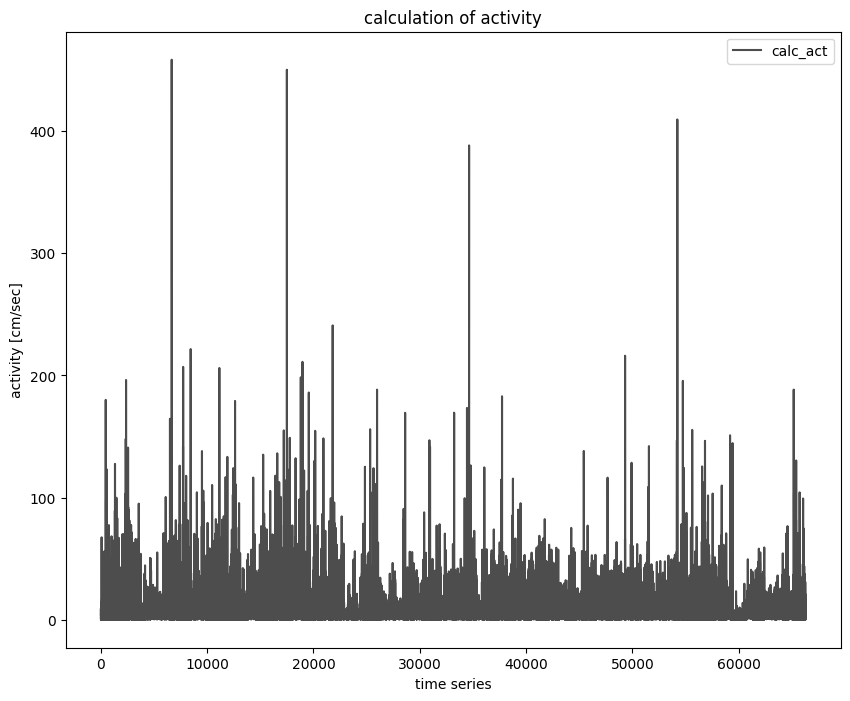

In [10]:
# グラフのサイズ設定
plt.rcParams['figure.figsize'] = [10, 8]
cleaned.plot(y="calc_act", color="0.3", title="calculation of activity", ylabel="activity [cm/sec]", xlabel="time series")

In [11]:
# 全体から動きが50[cm/sec]以下の比率を計算しましょう
len(cleaned[cleaned['calc_act'] < 50.0])/len(cleaned)

0.9916113458056729

### 10.2.3. 10分単位でグループ化する

In [12]:
cleaned.dtypes

timestamp       object
X                int64
Y                int64
Z                int64
p_timestamp     object
p_x            float64
p_y            float64
p_z            float64
dist           float64
d_time         float64
calc_act       float64
dtype: object

In [13]:
# まず、cleanedデータフレームをコピーし、
cleaned2 = cleaned.copy()
# 必要な列だけを抽出し、
cleaned2 = cleaned2[['timestamp', 'calc_act']]
# timestampをdatetimeデータタイプに変更
cleaned2['timestamp'] = cleaned2['timestamp'].astype('datetime64[ns]')
cleaned2

                    timestamp  calc_act
1     2022-01-01 00:01:42.961  4.251486
2     2022-01-01 00:01:45.562  4.953517
3     2022-01-01 00:01:48.163  9.146772
4     2022-01-01 00:02:08.864  1.134954
5     2022-01-01 00:02:21.765  0.980475
...                       ...       ...
66276 2022-01-31 23:28:00.481  3.167744
66277 2022-01-31 23:28:41.683  0.084076
66278 2022-01-31 23:28:49.383  1.055070
66279 2022-01-31 23:32:36.426  0.030831
66280 2022-01-31 23:32:44.126  0.389610

[66280 rows x 2 columns]

In [14]:
cleaned2.dtypes

timestamp    datetime64[ns]
calc_act            float64
dtype: object

In [15]:
cleaned2 = cleaned2.set_index('timestamp')
cleaned2.dtypes

calc_act    float64
dtype: object

In [16]:
cleaned2

                         calc_act
timestamp                        
2022-01-01 00:01:42.961  4.251486
2022-01-01 00:01:45.562  4.953517
2022-01-01 00:01:48.163  9.146772
2022-01-01 00:02:08.864  1.134954
2022-01-01 00:02:21.765  0.980475
...                           ...
2022-01-31 23:28:00.481  3.167744
2022-01-31 23:28:41.683  0.084076
2022-01-31 23:28:49.383  1.055070
2022-01-31 23:32:36.426  0.030831
2022-01-31 23:32:44.126  0.389610

[66280 rows x 1 columns]

In [17]:
tenmin = cleaned2.resample('10min')
result = tenmin['calc_act'].agg(['mean', 'min', 'max'])
result

                          mean       min        max
timestamp                                          
2022-01-01 00:00:00   2.359774  0.205775   9.146772
2022-01-01 00:10:00   3.804910  0.011198  12.985407
2022-01-01 00:20:00   1.204413  0.176624   3.200697
2022-01-01 00:30:00   0.065608  0.065608   0.065608
2022-01-01 00:40:00        NaN       NaN        NaN
...                        ...       ...        ...
2022-01-31 22:50:00   5.271830  0.174116  16.061886
2022-01-31 23:00:00        NaN       NaN        NaN
2022-01-31 23:10:00  11.671627  0.090195  31.025631
2022-01-31 23:20:00   3.598816  0.032785  23.493043
2022-01-31 23:30:00   0.210221  0.030831   0.389610

[4462 rows x 3 columns]

<AxesSubplot: title={'center': 'resample by 10-minute'}, xlabel='timestamp', ylabel='Average activity [cm/sec]'>

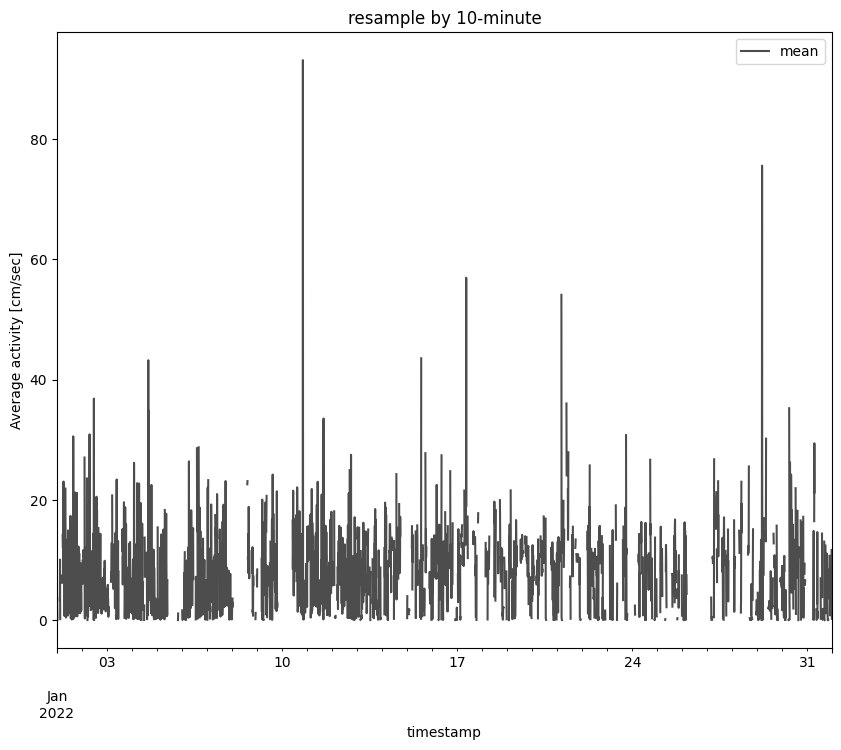

In [18]:
result.plot(y="mean", color="0.3", title="resample by 10-minute",
            ylabel="Average activity [cm/sec]", xlabel="timestamp")

### 10.2.4. 1時間単位でグループ化する

In [19]:
oneHour = cleaned2.resample('1H')
result = oneHour['calc_act'].agg(['mean', 'min', 'max'])
result

                         mean       min        max
timestamp                                         
2022-01-01 00:00:00  3.025915  0.011198  14.338601
2022-01-01 01:00:00  3.948859  0.013024   7.813303
2022-01-01 02:00:00  1.965045  0.006504   9.646105
2022-01-01 03:00:00  9.173303  0.065512  67.447458
2022-01-01 04:00:00  6.503876  0.000000  28.781980
...                       ...       ...        ...
2022-01-31 19:00:00  3.453507  0.014785  39.131190
2022-01-31 20:00:00  0.052261  0.005667   0.112500
2022-01-31 21:00:00  8.707639  0.076334  43.773557
2022-01-31 22:00:00  5.980594  0.000000  37.328848
2022-01-31 23:00:00  7.525590  0.030831  31.025631

[744 rows x 3 columns]

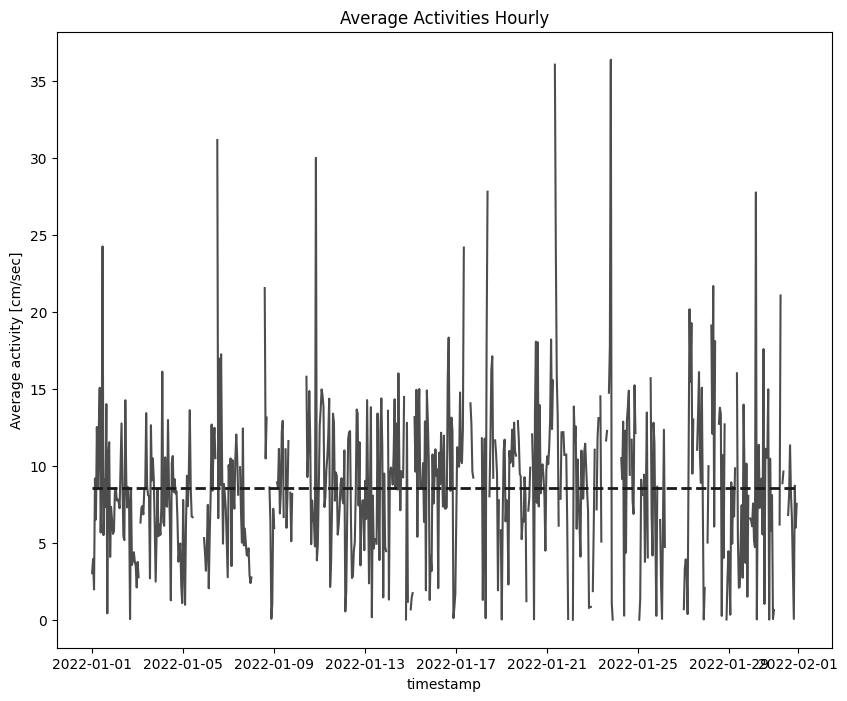

In [20]:
plt.plot( result['mean'], color='0.3')

# 速度（活動）平均線
plt.hlines(result['mean'].mean(),  min(result.index),
          max(result.index),  color='0.1', linestyle='--', linewidth=2)

plt.title("Average Activities Hourly")
plt.xlabel("timestamp")
plt.ylabel("Average activity [cm/sec]")

plt.show()

### 10.2.5. 1日単位でグループ化する

In [21]:
oneDay = cleaned2.resample('D')
result = oneDay['calc_act'].agg(['mean', 'min', 'max'])
result

                 mean       min         max
timestamp                                  
2022-01-01   8.801942  0.000000  180.000000
2022-01-02   6.869050  0.000000  196.279481
2022-01-03   7.388244  0.000000  458.448986
2022-01-04   8.304327  0.000000  221.561886
2022-01-05   7.711977  0.005796  110.315326
2022-01-06  10.305163  0.000000  206.091424
2022-01-07   6.816522  0.000000  179.109595
2022-01-08   9.871009  0.000000  116.407418
2022-01-09   8.701704  0.000000  135.110723
2022-01-10  11.156967  0.000000  450.233824
2022-01-11  10.660832  0.000000  211.111111
2022-01-12   6.020254  0.000000  240.948369
2022-01-13   6.107588  0.000000  188.348928
2022-01-14   9.636747  0.000000  146.919864
2022-01-15   7.862417  0.000000   78.173974
2022-01-16   9.066776  0.000000  388.290526
2022-01-17  11.044858  0.000000  182.926638
2022-01-18   9.667966  0.000000  115.527314
2022-01-19   9.401230  0.000000   82.334133
2022-01-20   9.196950  0.000000  138.154365
2022-01-21  10.991172  0.000000 

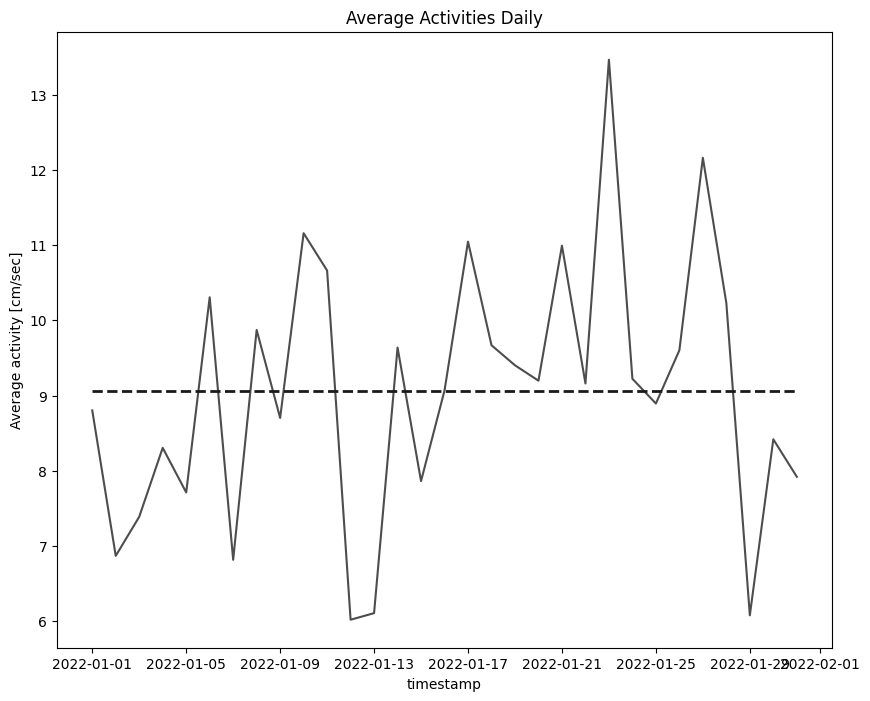

In [22]:
plt.plot( result['mean'], color='0.3')

# 速度（活動）平均線
plt.hlines(result['mean'].mean(),  min(result.index),
           max(result.index),  color='0.1', linestyle='--', linewidth=2)

plt.title("Average Activities Daily")
plt.xlabel("timestamp")
plt.ylabel("Average activity [cm/sec]")

plt.show()

In [23]:
# 平均値の平均
result['mean'].mean()

9.05568759014742